## About the dataset

The data at hand contains medical costs of people characterized by certain attributes.

#### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

#### 2. Read the data

In [2]:
Insurance = pd.read_csv("insurance.csv", sep=',')
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3. Basic EDA
a. shape of the data

In [3]:
print ('Shape of the data: Rows=', Insurance.shape[0] , ', Columns=', Insurance.shape[1])

Shape of the data: Rows= 1338 , Columns= 7


b. Data type of each attribute

In [4]:
print ('Data Type of each attribute:\n',Insurance.dtypes)

Data Type of each attribute:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


c. Checking the presence of missing values

In [5]:
print ('Checking missing values:\n', Insurance.isna().sum())

Checking missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


 <strong> Inference - No missing values in the dataset </strong>

d. 5 point summary of numerical attributes

In [6]:
Insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<strong> Inference - Individual medical costs billed is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost very high amount. Average age shows data represents adult population around 25+. </strong>

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

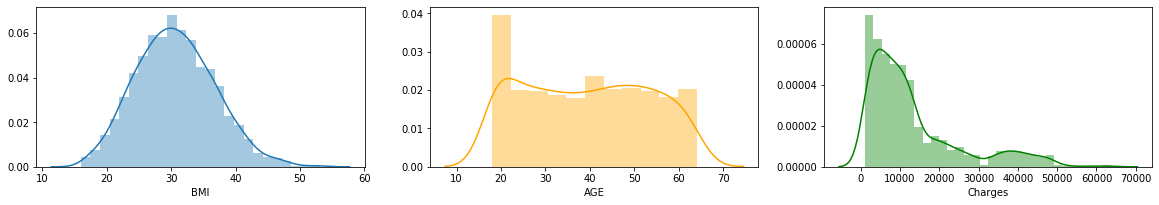

In [7]:
plt.show()
plt.figure(figsize= (20,10))
plt.subplot(3,3,1)
sns.distplot(Insurance.bmi)
plt.xlabel('BMI')
plt.subplot(3,3,2)
sns.distplot(Insurance.age,color='orange')
plt.xlabel('AGE')
plt.subplot(3,3,3)
sns.distplot(Insurance.charges,color= 'green')
plt.xlabel('Charges')
plt.show()

<strong> Inference: BMI is normally distributed. Age is uniformly distributed between 25 to 60. Charges is left skewed distributed </strong>

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [8]:
Skewness = pd.DataFrame({'SKEWNESS' : [Insurance.bmi.skew(),Insurance.age.skew(),Insurance.charges.skew()]}, 
                        index=['BMI','AGE','CHARGES'])
Skewness.T

,BMI,AGE,CHARGES
SKEWNESS,0.284047,0.055673,1.51588


<strong> Inference: bmi is very less skewed, no skew for age ,charges are highly skewed </strong>

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

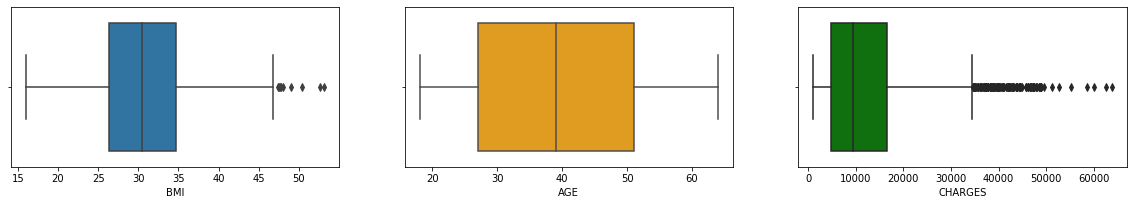

In [9]:
plt.figure(figsize= (20,10))
plt.subplot(3,3,1)
sns.boxplot(x = Insurance.bmi)
plt.xlabel('BMI')
plt.subplot(3,3,2)
sns.boxplot(x = Insurance.age,color='orange')
plt.xlabel('AGE')
plt.subplot(3,3,3)
sns.boxplot(x = Insurance.charges,color='green')
plt.xlabel('CHARGES')
plt.show()

<strong> Inference: BMI and Charges has outliers. Charges being skewed has many outliers.</strong>

h. Distribution of categorical columns (include children)

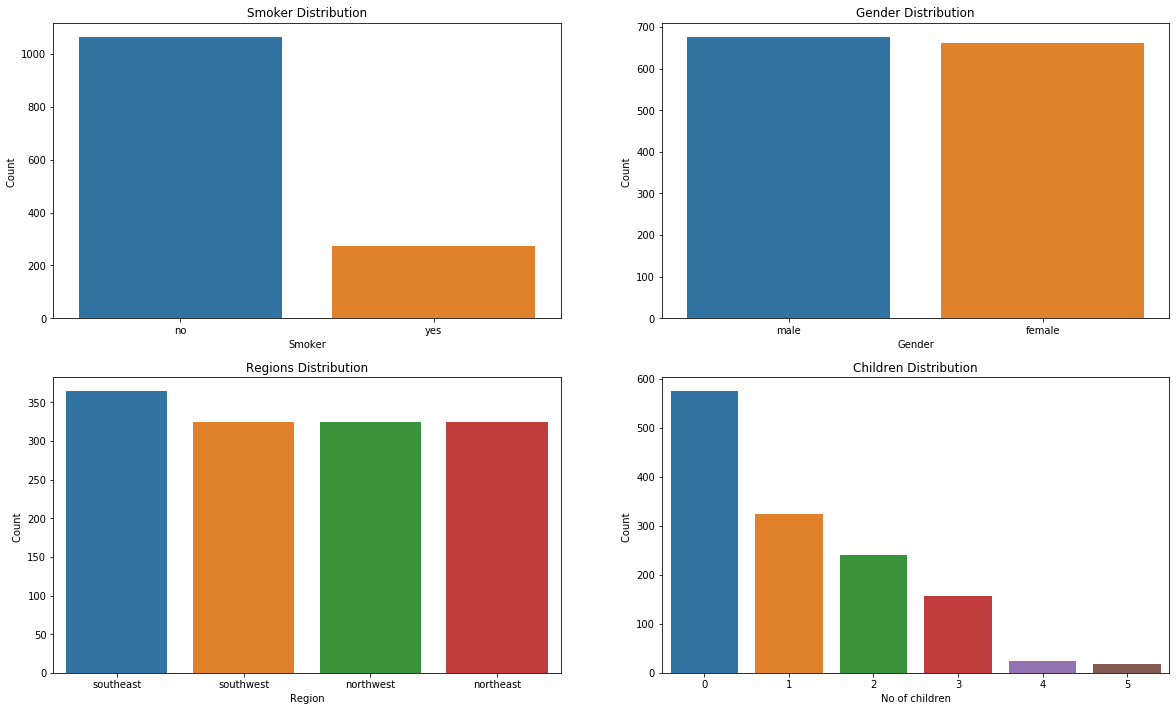

In [10]:
# Categolical columns are smokers, region and sex. Children to be included to understand distribution
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.barplot(Insurance['smoker'].value_counts().index, Insurance['smoker'].value_counts().values)
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker Distribution')
plt.subplot(4,2,2)
sns.barplot(Insurance['sex'].value_counts().index, Insurance['sex'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender Distribution')
plt.subplot(4,2,3)
sns.barplot(Insurance['region'].value_counts().index, Insurance['region'].value_counts().values)
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Regions Distribution')
plt.subplot(4,2,4)
sns.barplot(Insurance['children'].value_counts().index, Insurance['children'].value_counts().values)
plt.xlabel('No of children')
plt.ylabel('Count ')
plt.title('Children Distribution')

plt.show()

<strong> Inference: <br>
In the data non-smokers count is more.<br>
Male and Female count is also distributed evenly. <br>
Data are distributed evenly accross all regions. <br>
Most of the population sample have less than 2 children and very few have 4 or 5 children.</strong>

i. Pair plot that includes all the columns of the data frame

Actual form 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 
 Transformed form 
    age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


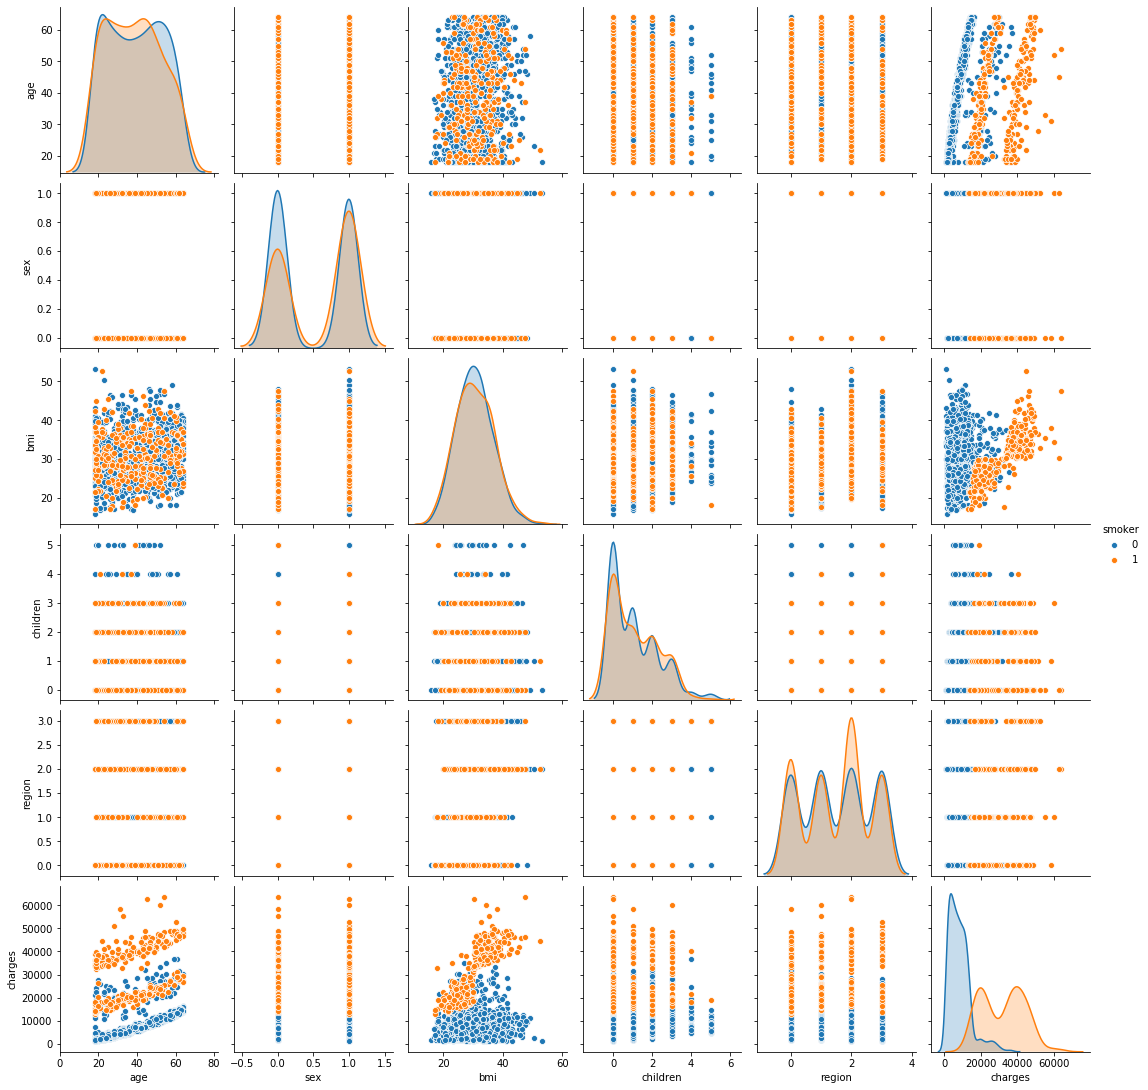

In [12]:
# Pairplot works on numerical data. So Categorical data need to be converted to numerical data
from sklearn.preprocessing import LabelEncoder
import copy
Insurance_T = copy.deepcopy(Insurance) #new dataset with categorical data to be transformed to numerical data
lb_make = LabelEncoder()
Insurance_T.loc[:,['sex','smoker','region']] = Insurance_T.loc[:,['sex', 'smoker', 'region']].apply(lb_make.fit_transform)
print('Actual form \n', Insurance.head() , '\n Transformed form \n' , Insurance_T.head())
sns.pairplot(Insurance_T,diag_kind = 'kde', hue = 'smoker')
# Taken smoker-nonsmoker as hue as it seems the best feature to predict charges from all the columns.
plt.show()

<strong> Inference: <br>
Age and Charges are corelated. Pattern shows increase in charges with the increase in age indicating older are charged more. <br>
Smoking habit and Charges are corelated. Smoker are charged more than the non-smokers.<br>
Remaining features seems just noice and seems not relevant to predict charges. </strong>

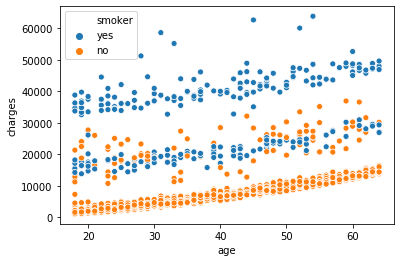

In [29]:
# Scatter plot gives better visualization of above inference about corelation of age, charges and smoker-nonsmoker
sns.scatterplot(x='age',y='charges',data=Insurance,hue='smoker')
plt.show()

#### 4. Statistical Evidence
a. Do charges of people who smoke differ significantly from the people who don't?

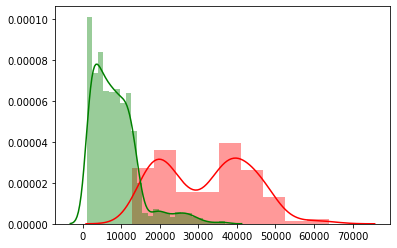

In [33]:
# Through Visualisation:
smoke = np.array(Insurance[Insurance.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers
nosmoke = np.array(Insurance[Insurance.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers
sns.distplot(smoke,color = 'red')
sns.distplot(nosmoke, color = 'green')
plt.show()

In [94]:
# In EDA we could infer the above question the charges differ for smoker and non-smoker.
# However, statistical evidence can prove a significant relationship between charges and smoking habbit.
# Using hypothesis t-test we see to prove that charges for smoker and non-smoker are not same and differ significantly.
print('Hypothesis defined as below:')
print('  Null Hypothesis :"Charges for smoker and non-smoker are same"')
print('  Alternate Hypothesis: "Charges for smoker and non-smoker are not the same"')

# Using two-sided test to prove that the null hypothesis that 2 independent samples have identical average (expected) values.
stat, p_value  = stats.ttest_ind(smoke,nosmoke)

# Setting significance level at 5%
print( '\n \033[1m Inference of statistical test on above defined hypothesis using ttest for independent unpaired Two Sample: ') 
if p_value < 0.05:  
    print( '  As the p_value %1.3f less than 0.05 we reject the Null Hyothesis.' %p_value) 
    print( '  Yes, Charges of people who smoke differ significantly from the people who dont')
    print( '  It also matches the inference from the above EDA we did.')
else:
    print( '  As the p_value %1.3f greater than 0.05 we cannot reject the Null Hyothesis.' %p_value) 
    print( '  No, Charges of people who smoke are same for the people who dont')

Hypothesis defined as below:
  Null Hypothesis :"Charges for smoker and non-smoker are same"
  Alternate Hypothesis: "Charges for smoker and non-smoker are not the same"

  Inference of statistical test on above defined hypothesis using ttest for independent unpaired Two Sample: 
  As the p_value 0.000 less than 0.05 we reject the Null Hyothesis.
  Yes, Charges of people who smoke differ significantly from the people who dont
  It also matches the inference from the above EDA we did.


b. Does bmi of males differ significantly from that of females?

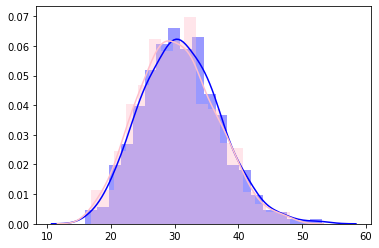

In [41]:
# Through Visualisation:
male_bmi = np.array(Insurance[Insurance.sex == 'male'].bmi)  # Selecting bmi corresponding to male
female_bmi = np.array(Insurance[Insurance.sex == 'female'].bmi) # Selecting bmi corresponding to female
sns.distplot(male_bmi,color = 'blue')
sns.distplot(female_bmi, color = 'pink')
plt.show()

In [93]:
# From EDA above we observe there seems no significant relationship.
# We use hypothesis test to find if there is significant relation between bmi and gender.
print('Hypothesis defined as below:')
print('  Null Hypothesis :"There is no relationship between bmi and gender"')
print('  Alternate Hypothesis: "There is a significant relationship between bmi and gender"')

# Using two-sided test to prove that the null hypothesis that 2 independent samples have identical average (expected) values.
stat, p_value  = stats.ttest_ind(male_bmi,female_bmi) 

# Setting significance level at 5%
print( '\n \033[1m Inference of statistical test on above defined hypothesis: ') 
if p_value < 0.05:
    print( '  As the p_value %1.3f < 0.05 we reject the Null Hyothesis.' %p_value) 
    print( '  Yes, There is a significant relationship between bmi and gender')
else:
    print( '  As the p_value %1.3f > 0.05 we cannot reject the Null Hyothesis.' %p_value) 
    print( '  No, There is no relationship between bmi and gender')
    print( '  It also matches the inference from the above EDA we did.')

Hypothesis defined as below:
  Null Hypothesis :"There is no relationship between bmi and gender"
  Alternate Hypothesis: "There is a significant relationship between bmi and gender"

  Inference of statistical test on above defined hypothesis: 
  As the p_value 0.090 > 0.05 we cannot reject the Null Hyothesis.
  No, There is no relationship between bmi and gender
  It also matches the inference from the above EDA we did.


c. Is the proportion of smokers significantly different in different genders?

In [71]:
Tab_Smokers_Genders = pd.crosstab(Insurance['sex'],Insurance['smoker'])
Tab_Smokers_Genders

smoker,no,yes
sex,,
female,547,115
male,517,159


In [98]:
# Statistically we further try using hypothesis test to find any siginificant relationship between gender and smoking habit.
print('Hypothesis defined as below:')
print('  Null Hypothesis :"There is no relationship between gender and smoking habit"')
print('  Alternate Hypothesis: "There is significant relationship between gender and smoking"')

stat, p_value, dof, expected_frequencies = stats.chi2_contingency(Tab_Smokers_Genders)

# Setting significance level at 5%
print( '\n \033[1m Inference of statistical test on above defined hypothesis: ') 
if p_value < 0.05:
    print( '  As the p_value %1.3f < 0.05 we reject the Null Hyothesis.' %p_value ) 
    print( '  Yes, There is significant relationship between gender and smoking habit')
else:
    print( '  As the p_value %1.3f > 0.05 we cannot reject the Null Hyothesis.' %p_value) 
    print( '  No, There is no significant relationship between gender and smoking habit')

Hypothesis defined as below:
  Null Hypothesis :"There is no relationship between gender and smoking habit"
  Alternate Hypothesis: "There is significant relationship between gender and smoking"

  Inference of statistical test on above defined hypothesis: 
  As the p_value 0.007 < 0.05 we reject the Null Hyothesis.
  Yes, There is significant relationship between gender and smoking habit


d. Is the distribution of bmi across women with no children, one child and two children, the same ?

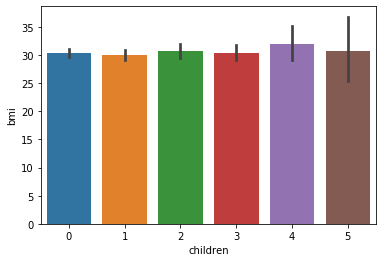

In [74]:
# Through Visualisation:
# Data to be considered across women only as per question
Women_DF = copy.deepcopy(Insurance[Insurance['sex'] == 'female'])
sns.barplot( y = Women_DF['bmi'], x = Women_DF['children'])
plt.show()

In [96]:
#Above EDA shows there seems no relation ship. 
#Statistically we try to find whether distribution of bmi across women with no children, one child and two children are the same.
#There are more than three samples so we go for anova chi square test.
print('Hypothesis defined as below:')
print('  Null Hypothesis :"There is no relationship between bmi and no of children"')
print('  Alternate Hypothesis: "There is significant relationship bmi and no of children"')

Women_Zero_child = Women_DF[Women_DF.children == 0]['bmi']
Women_One_child = Women_DF[Women_DF.children == 1]['bmi']
Women_Two_child = Women_DF[Women_DF.children == 2]['bmi']

stat, p_value = stats.f_oneway(Women_Zero_child,Women_One_child,Women_Two_child)

# Setting significance level at 5%
print( '\n  \033[1mInference of statistical test on above defined hypothesis: ') 
if p_value < 0.05:
    print( '  As the p_value %1.3f < 0.05 we reject the Null Hyothesis.' %p_value) 
    print( '  Yes, There is significant relationship bmi and no of children')
else:
    print( '  As the p_value %1.3f > 0.05 we cannot reject the Null Hyothesis.' %p_value) 
    print( '  No, There is no relationship between bmi and no of children and distribution of bmi is same')
    print( '  It also matches the inference from the above EDA we did.')    

Hypothesis defined as below:
  Null Hypothesis :"There is no relationship between bmi and no of children"
  Alternate Hypothesis: "There is significant relationship bmi and no of children"

  Inference of statistical test on above defined hypothesis: 
  As the p_value 0.716 > 0.05 we cannot reject the Null Hyothesis.
  No, There is no relationship between bmi and no of children and distribution of bmi is same
  It also matches the inference from the above EDA we did.


# Thank You